=== 地理范围信息 ===
最小经度 (minx): 118.357941
最大经度 (maxx): 119.226601
最小纬度 (miny): 31.231651
最大纬度 (maxy): 32.615547

=== 范围大小估算 ===
东西方向宽度: 96.42 km
南北方向高度: 153.61 km
覆盖面积估算: 14811.50 km²

=== 数据基本信息 ===
要素数量: 111135
坐标系统: EPSG:4326
属性字段: ['highway', 'pyname', 'length', 'width', 'geometry']


C:\Users\Elena\AppData\Local\Temp\ipykernel_1620\2021720366.py:41: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  geometry=[split_roads.unary_union.envelope],
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 32428 (\N{CJK UNIFIED IDEOGRAPH-7EAC}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 22320 (\N{CJK UNIFIED IDEOGRAPH-5730}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 29702 (\N{CJK UNIFIED IDEOGRAPH-7406}) missing from current font.


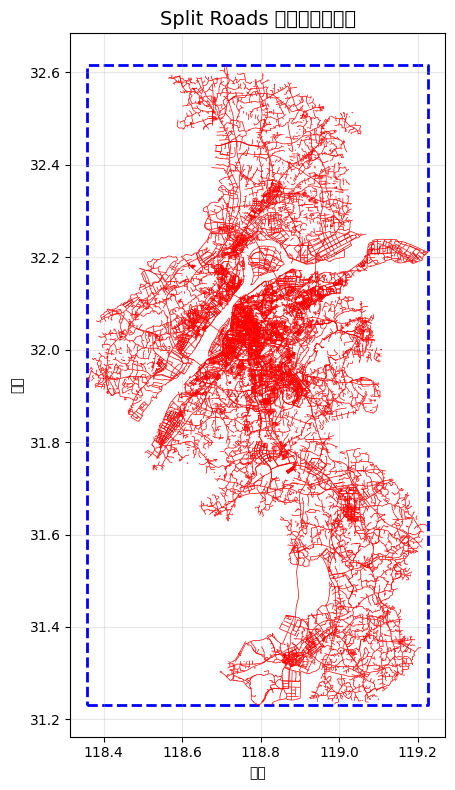

In [16]:
import geopandas as gpd
import matplotlib.pyplot as plt

# 读取split_roads.shp文件
split_roads = gpd.read_file('origin_roads.shp')

# 获取地理范围
bounds = split_roads.bounds

print("=== 地理范围信息 ===")
print(f"最小经度 (minx): {bounds['minx'].min():.6f}")
print(f"最大经度 (maxx): {bounds['maxx'].max():.6f}")
print(f"最小纬度 (miny): {bounds['miny'].min():.6f}")
print(f"最大纬度 (maxy): {bounds['maxy'].max():.6f}")

# 计算范围大小（粗略估算）
width_km = (bounds['maxx'].max() - bounds['minx'].min()) * 111
height_km = (bounds['maxy'].max() - bounds['miny'].min()) * 111

print(f"\n=== 范围大小估算 ===")
print(f"东西方向宽度: {width_km:.2f} km")
print(f"南北方向高度: {height_km:.2f} km")
print(f"覆盖面积估算: {width_km * height_km:.2f} km²")

# 显示数据基本信息
print(f"\n=== 数据基本信息 ===")
print(f"要素数量: {len(split_roads)}")
print(f"坐标系统: {split_roads.crs}")
print(f"属性字段: {list(split_roads.columns)}")

# 可视化地理范围
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
split_roads.plot(ax=ax, color='red', linewidth=0.5)
ax.set_title('Split Roads 地理范围可视化', fontsize=14)
ax.set_xlabel('经度')
ax.set_ylabel('纬度')
ax.grid(True, alpha=0.3)

# 添加边界框
bounds_polygon = gpd.GeoDataFrame(
    geometry=[split_roads.unary_union.envelope],
    crs=split_roads.crs
)
bounds_polygon.plot(ax=ax, facecolor='none', edgecolor='blue', linewidth=2, linestyle='--')

plt.tight_layout()
plt.show()

=== 原始边界 ===
经度范围: 118.357941 到 119.226601
纬度范围: 31.231651 到 32.615547

=== 裁剪后边界 ===
经度范围: 118.748838 到 118.792271
纬度范围: 32.027391 到 32.061989

=== 裁剪结果 ===
原始道路数量: 111135
裁剪后道路数量: 4607
裁剪后的道路数据已保存为 small_scale_roads.shp


C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 32428 (\N{CJK UNIFIED IDEOGRAPH-7EAC}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 21407 (\N{CJK UNIFIED IDEOGRAPH-539F}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 22987 (\N{CJK UNIFIED IDEOGRAPH-59CB}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\Elena\AppData\Roaming\Python\Python39\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 36947 (\N{CJK UNIFIED IDEOGRAPH-9053}) missing from current font.
  ax.figure

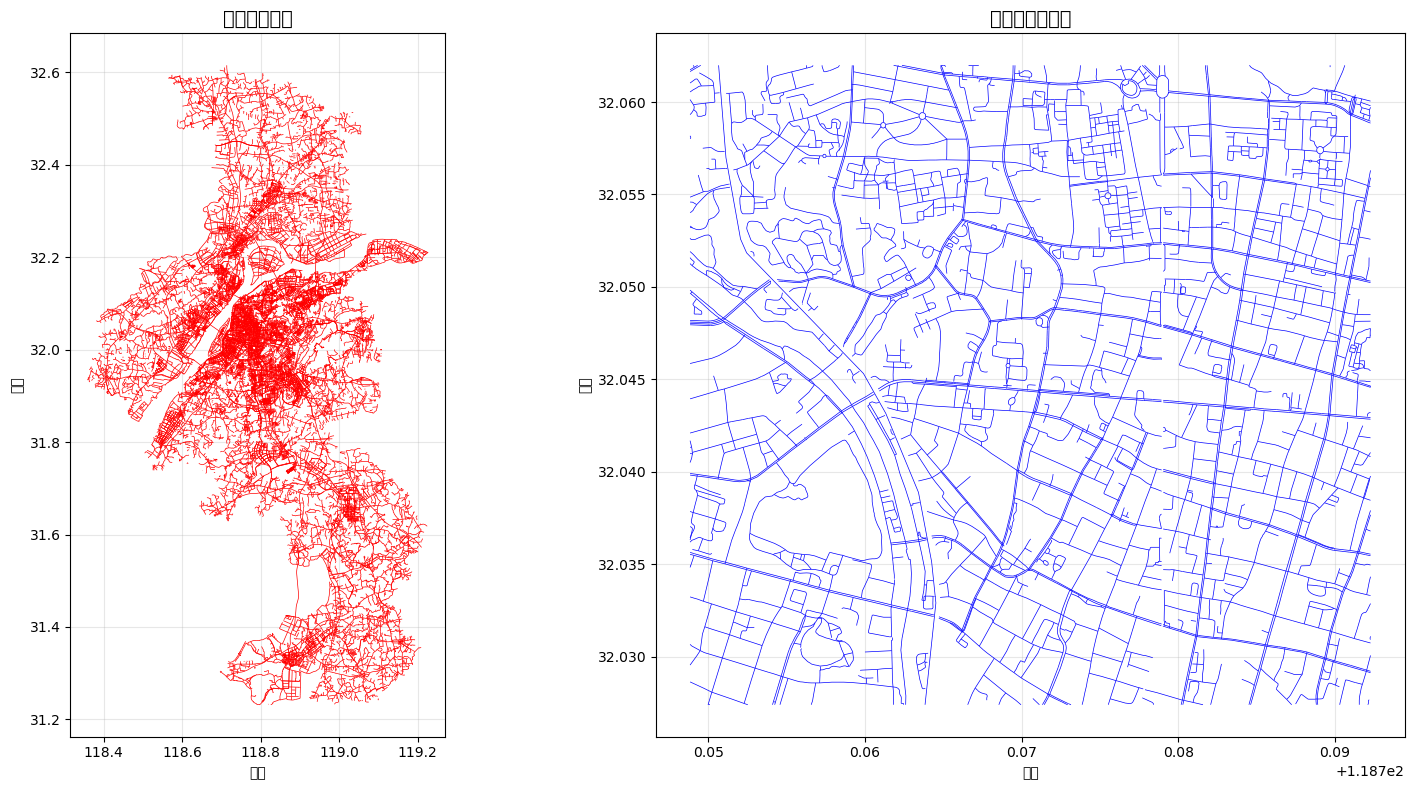


=== 裁剪后数据信息 ===
数据形状: (4607, 5)
坐标系统: EPSG:4326
属性字段: ['source', 'pyname', 'length', 'width', 'geometry']

=== 裁剪后数据边界 ===
最小经度: 118.748838
最大经度: 118.792271
最小纬度: 32.027391
最大纬度: 32.061989


In [27]:
import geopandas as gpd
from shapely.geometry import box

# 读取test_roads.shp文件
test_roads = gpd.read_file('origin_roads.shp')

# 获取原始边界
bounds = test_roads.bounds
minx, maxx = bounds['minx'].min(), bounds['maxx'].max()
miny, maxy = bounds['miny'].min(), bounds['maxy'].max()

print("=== 原始边界 ===")
print(f"经度范围: {minx:.6f} 到 {maxx:.6f}")
print(f"纬度范围: {miny:.6f} 到 {maxy:.6f}")

# 计算裁剪后的边界
# 东西方向取中间的十分之一
width = maxx - minx
new_minx = minx + width * (9/20)  # 从1/10处开始
new_maxx = minx + width * (10/20)  # 到9/10处结束

# 南北方向取中间的十分之一
height = maxy - miny
new_miny = miny + height * (23/40)  # 从9/20处开始
new_maxy = miny + height * (12/20)  # 到10/20处结束

# # 南北方向不变
# height = maxy - miny
# new_miny = miny + 0
# new_maxy = miny + height

print("\n=== 裁剪后边界 ===")
print(f"经度范围: {new_minx:.6f} 到 {new_maxx:.6f}")
print(f"纬度范围: {new_miny:.6f} 到 {new_maxy:.6f}")

# 创建裁剪边界框
clip_box = box(new_minx, new_miny, new_maxx, new_maxy)

# 裁剪道路数据
small_scale_roads = test_roads[test_roads.geometry.intersects(clip_box)].copy()

# 对相交的几何体进行精确裁剪
small_scale_roads['geometry'] = small_scale_roads.geometry.intersection(clip_box)

# 移除空的几何体
small_scale_roads = small_scale_roads[~small_scale_roads.geometry.is_empty]

print(f"\n=== 裁剪结果 ===")
print(f"原始道路数量: {len(test_roads)}")
print(f"裁剪后道路数量: {len(small_scale_roads)}")

# 保存裁剪后的道路数据
small_scale_roads.to_file('small_scale_roads.shp')
print("裁剪后的道路数据已保存为 small_scale_roads.shp")

# 可视化对比
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# 原始数据
test_roads.plot(ax=ax1, color='red', linewidth=0.5)
ax1.set_title('原始道路数据', fontsize=14)
ax1.set_xlabel('经度')
ax1.set_ylabel('纬度')
ax1.grid(True, alpha=0.3)

# 裁剪后数据
small_scale_roads.plot(ax=ax2, color='blue', linewidth=0.5)
ax2.set_title('裁剪后道路数据', fontsize=14)
ax2.set_xlabel('经度')
ax2.set_ylabel('纬度')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 显示裁剪后数据的基本信息
print(f"\n=== 裁剪后数据信息 ===")
print(f"数据形状: {small_scale_roads.shape}")
print(f"坐标系统: {small_scale_roads.crs}")
print(f"属性字段: {list(small_scale_roads.columns)}")

# 获取裁剪后数据的边界
test_bounds = small_scale_roads.bounds
print(f"\n=== 裁剪后数据边界 ===")
print(f"最小经度: {test_bounds['minx'].min():.6f}")
print(f"最大经度: {test_bounds['maxx'].max():.6f}")
print(f"最小纬度: {test_bounds['miny'].min():.6f}")
print(f"最大纬度: {test_bounds['maxy'].max():.6f}")

In [35]:
import geopandas as gpd

# 读取数据
gdf = gpd.read_file("origin_roads.shp")

# 筛选source为2的数据
source_2_data = gdf[gdf['source'] == 2]

print(f"source为2的数据总数: {len(source_2_data)}")
print(f"source为2的数据中width字段类型: {source_2_data['width'].dtype}")
print(f"source为2的数据中width空值数量: {source_2_data['width'].isna().sum()}")

# 查看width字段的统计情况
print(f"\nsource为2的数据width字段统计:")
print(source_2_data['width'].describe())

# 查看width值的分布
print(f"\nsource为2的数据width值分布:")
width_counts = source_2_data['width'].value_counts().sort_index()
print(width_counts)

# 查看前20个width值
print(f"\nsource为2的数据前20个width值:")
print(source_2_data['width'].head(20).tolist())

# 查看所有唯一的width值
print(f"\nsource为2的数据所有唯一width值:")
unique_widths = source_2_data['width'].dropna().unique()
print(sorted(unique_widths))

source为2的数据总数: 56677
source为2的数据中width字段类型: object
source为2的数据中width空值数量: 0

source为2的数据width字段统计:
count     56677
unique        3
top          55
freq      46042
Name: width, dtype: object

source为2的数据width值分布:
width
130     2851
30      7784
55     46042
Name: count, dtype: int64

source为2的数据前20个width值:
['55', '130', '55', '55', '30', '30', '55', '30', '55', '55', '55', '55', '55', '30', '30', '55', '55', '55', '55', '55']

source为2的数据所有唯一width值:
['130', '30', '55']


# Highway分类

In [36]:
import geopandas as gpd
import pandas as pd
import numpy as np

def highway_types_classification(gdf):
    """
    道路类型分类函数
    
    分类标准：
    - primary: data_source为1的道路 + data_source为2且width=130的道路
    - secondary: data_source为2且width=55的道路
    - street: data_source为2且width=30的道路 + data_source为3和4且存在pyname的数据
    - internal: data_source为3和4且不存在pyname的数据
    
    参数:
    gdf: GeoDataFrame，包含data_source, width, pyname字段
    
    返回:
    GeoDataFrame，包含新的highway分类字段
    """
    
    # 创建highway字段的副本用于分类
    gdf = gdf.copy()
    gdf['highway'] = 'unknown'  # 初始化为unknown
    
    print("开始道路类型分类...")
    print(f"总道路数: {len(gdf)}")
    
    # 检查必要字段
    required_fields = ['source', 'width', 'pyname']
    missing_fields = [field for field in required_fields if field not in gdf.columns]
    if missing_fields:
        print(f"警告：缺少必要字段: {missing_fields}")
        return gdf
    
    # 统计原始data_source分布
    print(f"\n原始data_source分布:")
    print(gdf['source'].value_counts().sort_index())
    
    # 1. primary分类
    # data_source为1的道路
    primary_condition_1 = (gdf['source'] == 1)
    # data_source为2且width=130的道路
    primary_condition_2 = (gdf['source'] == 2) & (gdf['width'] == '130')
    
    primary_mask = primary_condition_1 | primary_condition_2
    gdf.loc[primary_mask, 'highway'] = 'primary'
    
    primary_count = primary_mask.sum()
    print(f"primary: {primary_count} 条道路")
    print(f"  - data_source=1: {primary_condition_1.sum()} 条")
    print(f"  - data_source=2且width=130: {primary_condition_2.sum()} 条")
    
    # 2. secondary分类
    # data_source为2且width=55的道路
    secondary_mask = (gdf['source'] == 2) & (gdf['width'] == '55')
    gdf.loc[secondary_mask, 'highway'] = 'secondary'
    
    secondary_count = secondary_mask.sum()
    print(f"secondary: {secondary_count} 条道路")
    
    # 3. street分类
    # data_source为2且width=30的道路
    street_condition_1 = (gdf['source'] == 2) & (gdf['width'] == '30')
    # data_source为3和4且存在pyname的数据
    street_condition_2 = (gdf['source'].isin([3, 4])) & (gdf['pyname'].notna())
    
    street_mask = street_condition_1 | street_condition_2
    gdf.loc[street_mask, 'highway'] = 'street'
    
    street_count = street_mask.sum()
    print(f"street: {street_count} 条道路")
    print(f"  - data_source=2且width=30: {street_condition_1.sum()} 条")
    print(f"  - data_source=3,4且有pyname: {street_condition_2.sum()} 条")
    
    # 4. internal分类
    # data_source为3和4且不存在pyname的数据
    internal_mask = (gdf['source'].isin([3, 4])) & (gdf['pyname'].isna())
    gdf.loc[internal_mask, 'highway'] = 'internal'
    
    internal_count = internal_mask.sum()
    print(f"internal: {internal_count} 条道路")
    
    # 统计分类结果
    print(f"\n分类结果统计:")
    highway_counts = gdf['highway'].value_counts()
    print(highway_counts)
    
    # 检查未分类的道路
    unclassified = gdf[gdf['highway'] == 'unknown']
    if len(unclassified) > 0:
        print(f"\n警告：有 {len(unclassified)} 条道路未分类")
        print("未分类道路的data_source和width分布:")
        print(unclassified[['source', 'width']].value_counts().head(10))
    
    # 按data_source统计分类结果
    print(f"\n按data_source统计分类结果:")
    for data_source in sorted(gdf['source'].unique()):
        subset = gdf[gdf['source'] == data_source]
        print(f"\ndata_source={data_source}:")
        highway_dist = subset['highway'].value_counts()
        for highway_type, count in highway_dist.items():
            print(f"  {highway_type}: {count} 条")
    
    return gdf

def process_roads_with_classification(input_file, output_file=None):
    """
    完整的道路处理流程，包含分类和清洗
    
    参数:
    input_file: 输入shapefile路径
    output_file: 输出shapefile路径，如果为None则自动生成
    """
    
    print("=" * 60)
    print("道路数据处理和分类流程")
    print("=" * 60)
    
    # 1. 读取数据
    print(f"\n1. 读取数据: {input_file}")
    gdf = gpd.read_file(input_file)
    print(f"   原始道路数: {len(gdf)}")
    print(f"   字段: {list(gdf.columns)}")
    
    # 2. 数据预处理
    print(f"\n2. 数据预处理...")
    
    # 确保几何类型是LineString
    original_count = len(gdf)
    gdf = gdf[gdf.geometry.geom_type == 'LineString']
    print(f"   LineString类型道路: {len(gdf)} 条 (移除了 {original_count - len(gdf)} 条)")
    
    # 检查必要字段
    if 'source' not in gdf.columns:
        print("   错误：缺少data_source字段！")
        return None
    
    # 3. 道路分类
    print(f"\n3. 道路类型分类...")
    gdf = highway_types_classification(gdf)
    
    # 4. 保存结果
    if output_file is None:
        output_file = input_file.replace('.shp', '_classified.shp')
    
    print(f"\n4. 保存结果: {output_file}")
    gdf.to_file(output_file)
    print(f"   ✓ 已保存 {len(gdf)} 条道路")
    
    return gdf

# 使用示例
if __name__ == "__main__":
    # 处理道路数据
    input_file = "small_scale_roads.shp"  # 替换为您的输入文件路径
    result = process_roads_with_classification(input_file)
    
    if result is not None:
        print(f"\n处理完成！")
        print(f"最终字段: {list(result.columns)}")
        print(f"最终道路数: {len(result)}")
        
        # 显示分类结果示例
        print(f"\n分类结果示例:")
        sample = result[['source', 'width', 'pyname', 'highway']].head(10)
        print(sample.to_string())

道路数据处理和分类流程

1. 读取数据: small_scale_roads.shp
   原始道路数: 4607
   字段: ['source', 'pyname', 'length', 'width', 'geometry']

2. 数据预处理...
   LineString类型道路: 4605 条 (移除了 2 条)

3. 道路类型分类...
开始道路类型分类...
总道路数: 4605

原始data_source分布:
source
1       1
2    2431
3    1583
4     590
Name: count, dtype: int64
primary: 132 条道路
  - data_source=1: 1 条
  - data_source=2且width=130: 131 条
secondary: 1720 条道路
street: 911 条道路
  - data_source=2且width=30: 580 条
  - data_source=3,4且有pyname: 331 条
internal: 1842 条道路

分类结果统计:
highway
internal     1842
secondary    1720
street        911
primary       132
Name: count, dtype: int64

按data_source统计分类结果:

data_source=1:
  primary: 1 条

data_source=2:
  secondary: 1720 条
  street: 580 条
  primary: 131 条

data_source=3:
  internal: 1277 条
  street: 306 条

data_source=4:
  internal: 565 条
  street: 25 条

4. 保存结果: small_scale_roads_classified.shp
   ✓ 已保存 4605 条道路

处理完成！
最终字段: ['source', 'pyname', 'length', 'width', 'geometry', 'highway']
最终道路数: 4605

分类结果示例:
   source wi

# 清洗道路数据

In [1]:
import geopandas as gpd
import os
import pandas as pd
import shapely
import numpy as np
import collections
from scipy.spatial import cKDTree
from tqdm import tqdm


def get_highway_priority(highway_type):
    """
    获取highway类型的优先级（数字越小优先级越高）
    """
    priority_map = {
        'primary': 1,
        'secondary': 2, 
        'street': 3,
        'internal': 4
    }
    return priority_map.get(highway_type, 5)

def upgrade_highway_type(highway1, highway2):
    """
    将两个highway类型升级为更高等级的类型
    """
    priority1 = get_highway_priority(highway1)
    priority2 = get_highway_priority(highway2)
    
    # 返回优先级更高的（数字更小的）
    if priority1 <= priority2:
        return highway1
    else:
        return highway2


def remove_false_nodes_by_highway_kdtree(gdf, tolerance=30, max_iterations=3):
    """
    清理道路拓扑：移除度为2的假节点
    1. 合并相同highway类型的道路（原有逻辑）
    2. 合并相同pyname的道路，并升级highway类型
    使用KD-tree进行高效空间搜索，迭代式处理确保彻底清理
    """
    
    def single_iteration(gdf, tolerance):
        """单次迭代的合并逻辑"""
        if isinstance(gdf, (gpd.GeoDataFrame, gpd.GeoSeries)):
            df = gdf.reset_index(drop=True).explode(ignore_index=True)
            geom = df.geometry.array
        else:
            geom = gdf
            df = gpd.GeoSeries(gdf)

        # 提取坐标数组和每个几何体的坐标数量
        coords = shapely.get_coordinates(geom)
        indices = shapely.get_num_coordinates(geom)

        # 生成起点和终点坐标列表及其索引
        c = 0
        coordinates = []
        for i, ind in enumerate(indices):
            coordinates.append([c, i, 0])  # 起点
            coordinates.append([c + ind - 1, i, 1])  # 终点
            c += ind

        # 创建KD-tree进行高效空间搜索
        coords_array = np.array(coords)
        tree = cKDTree(coords_array[:, :2])
        
        # 在容差范围内查找邻近点
        nearby_points = tree.query_ball_tree(tree, tolerance)
        
        # 创建坐标字典：坐标 -> [具有该坐标的线段索引列表]
        coord_dict = collections.defaultdict(list)
        for i, (coord_idx, line_idx, pos) in enumerate(coordinates):
            coord = coords[coord_idx]
            coord_dict[tuple(coord)].append((line_idx, pos))
        
        # 情况1：查找度为2的节点（假节点）- 相同highway类型
        false_nodes = []
        processed_coords = set()
        
        for coord, lines in tqdm(coord_dict.items(), desc="检查节点（相同highway）", total=len(coord_dict)):
            if len(lines) == 2 and coord not in processed_coords:
                line1_idx, line2_idx = lines[0][0], lines[1][0]
                
                # 获取highway类型
                highway1 = df.iloc[line1_idx].get('highway', 'unknown')
                highway2 = df.iloc[line2_idx].get('highway', 'unknown')
                
                # 只有当highway类型相同时才合并
                if highway1 == highway2:
                    false_nodes.append((coord, lines, 'same_highway'))
                    processed_coords.add(coord)
        
        # 情况2：查找相同pyname的道路进行合并
        pyname_merge_candidates = []
        
        # 按pyname分组，查找可以合并的道路
        pyname_groups = df.groupby('pyname')
        
        for pyname, group in tqdm(pyname_groups, desc="检查相同pyname道路"):
            if pd.isna(pyname) or len(group) < 2:
                continue
                
            group_indices = group.index.tolist()
            
            # 检查组内道路是否在空间上相邻
            for i in range(len(group_indices)):
                for j in range(i + 1, len(group_indices)):
                    idx1, idx2 = group_indices[i], group_indices[j]
                    
                    # 检查两条道路是否在容差范围内相邻
                    geom1 = geom[idx1]
                    geom2 = geom[idx2]
                    
                    if geom1.distance(geom2) <= tolerance:
                        pyname_merge_candidates.append((idx1, idx2, 'same_pyname'))
        
        # 合并所有候选道路
        all_merge_candidates = false_nodes + pyname_merge_candidates
        
        if not all_merge_candidates:
            return gdf, 0
        
        # 合并线段
        merged_lines = []
        merged_attributes = []
        used_indices = set()
        
        for candidate in tqdm(all_merge_candidates, desc="合并道路"):
            if len(candidate) == 3:
                if isinstance(candidate[1], list):  # false_nodes格式
                    coord, lines, merge_type = candidate
                    line1_idx, line2_idx = lines[0][0], lines[1][0]
                else:  # pyname_merge_candidates格式
                    line1_idx, line2_idx, merge_type = candidate
                    coord = None
            
            if line1_idx in used_indices or line2_idx in used_indices:
                continue
                
            # 获取两条线
            line1 = geom[line1_idx]
            line2 = geom[line2_idx]
            
            # 合并线段
            if merge_type == 'same_highway':
                # 原有逻辑：根据连接方式合并
                if lines[0][1] == 0 and lines[1][1] == 0:  # 都是起点
                    merged = line1.reverse().union(line2)
                elif lines[0][1] == 1 and lines[1][1] == 1:  # 都是终点
                    merged = line1.union(line2.reverse())
                else:  # 一个起点，一个终点
                    merged = line1.union(line2)
            else:  # same_pyname
                # 新逻辑：直接合并
                merged = line1.union(line2)
            
            # 确保是LineString
            if merged.geom_type == 'MultiLineString':
                merged = shapely.line_merge(merged)
            
            if merged.geom_type == 'LineString':
                merged_lines.append(merged)
                
                # 处理属性
                attrs1 = df.iloc[line1_idx].to_dict()
                attrs2 = df.iloc[line2_idx].to_dict()
                
                if merge_type == 'same_highway':
                    # 相同highway类型：保留第一条线的属性
                    merged_attrs = attrs1.copy()
                else:  # same_pyname
                    # 相同pyname：升级highway类型
                    highway1 = attrs1.get('highway', 'unknown')
                    highway2 = attrs2.get('highway', 'unknown')
                    upgraded_highway = upgrade_highway_type(highway1, highway2)
                    
                    merged_attrs = attrs1.copy()
                    merged_attrs['highway'] = upgraded_highway
                    print(f"  合并相同pyname道路: {attrs1.get('pyname')} ({highway1} + {highway2} → {upgraded_highway})")
                
                merged_attrs['geometry'] = merged
                merged_attributes.append(merged_attrs)
                
                used_indices.add(line1_idx)
                used_indices.add(line2_idx)
        
        # 添加未使用的线段
        for i in tqdm(range(len(geom)), desc="处理剩余道路"):
            if i not in used_indices:
                merged_lines.append(geom[i])
                
                # 保留原始属性
                attrs = df.iloc[i].to_dict()
                attrs['geometry'] = geom[i]
                merged_attributes.append(attrs)
        
        # 创建新的GeoDataFrame
        result = gpd.GeoDataFrame(merged_attributes, crs=df.crs)
        merged_count = len(geom) - len(merged_lines)
        
        return result, merged_count
    
    # 迭代执行
    current_gdf = gdf.copy()
    total_merged = 0
    
    # 使用tqdm创建迭代进度条
    with tqdm(total=max_iterations, desc="迭代清理", unit="轮") as pbar:
        for iteration in range(max_iterations):
            pbar.set_postfix({
                '当前道路数': len(current_gdf),
                '已合并': total_merged
            })
            
            result_gdf, merged_count = single_iteration(current_gdf, tolerance)
            
            if merged_count == 0:
                pbar.set_postfix({
                    '当前道路数': len(current_gdf),
                    '已合并': total_merged,
                    '状态': '完成'
                })
                pbar.update(1)
                print(f"\n第 {iteration + 1} 次迭代没有发现新的合并，停止迭代")
                break
            
            total_merged += merged_count
            current_gdf = result_gdf
            pbar.update(1)
            print(f"\n本次迭代合并了 {merged_count} 条道路")
    
    print(f"\n迭代完成：总共合并了 {total_merged} 条道路")
    print(f"最终道路数量：{len(current_gdf)}")
    
    return current_gdf

def fix_roads_with_momepy():
    """使用修改后的remove_false_nodes修复道路文件"""
    
    # 检查输入文件是否存在
    input_file = "small_scale_roads_classified.shp"
    output_file = "fixed_roads.shp"
    
    if not os.path.exists(input_file):
        print(f"错误：未找到 {input_file} 文件！")
        return
    
    print("正在加载数据...")
    # 加载数据
    roads = gpd.read_file(input_file)
    print(f"加载了 {len(roads)} 条道路")
    print(f"原始字段: {list(roads.columns)}")
    
    # 数据预处理
    print("正在进行数据预处理...")
    
    # 确保几何类型是LineString
    roads = roads[roads.geometry.geom_type == 'LineString']
    print(f"LineString类型道路：{len(roads)} 条")
    
    # 检查highway字段
    if 'highway' not in roads.columns:
        print("警告：数据中没有highway字段，将使用默认处理方式")
        roads['highway'] = 'unknown'
    
    # 使用迭代式函数处理
    print("正在使用迭代式KD-tree优化的remove_false_nodes处理...")
    print("合并规则：")
    print("1. 相同highway类型的相邻道路")
    print("2. 相同pyname的道路（升级highway类型）")
    fixed_roads = remove_false_nodes_by_highway_kdtree(roads, tolerance=50, max_iterations=3)
    
    # 检查结果
    print(f"处理后字段: {list(fixed_roads.columns)}")
    print(f"字段数量对比: 原始 {len(roads.columns)} vs 处理后 {len(fixed_roads.columns)}")
    
    # 统计highway类型变化
    print(f"\nhighway类型分布变化:")
    print("原始分布:")
    print(roads['highway'].value_counts())
    print("处理后分布:")
    print(fixed_roads['highway'].value_counts())
    
    # 保存结果
    print(f"正在保存结果到 {output_file}...")
    fixed_roads.to_file(output_file)
    print(f"✓ 处理完成！输出文件：{output_file}")
    print(f"  原始道路数量：{len(roads)}")
    print(f"  处理后道路数量：{len(fixed_roads)}")
    print(f"  减少了 {len(roads) - len(fixed_roads)} 条道路")

# 调用函数
if __name__ == "__main__":
    fix_roads_with_momepy()

正在加载数据...
加载了 4605 条道路
原始字段: ['source', 'pyname', 'length', 'width', 'highway', 'geometry']
正在进行数据预处理...
LineString类型道路：4605 条
正在使用迭代式KD-tree优化的remove_false_nodes处理...
合并规则：
1. 相同highway类型的相邻道路
2. 相同pyname的道路（升级highway类型）


检查相同pyname道路: 100%|██████████| 281/281 [00:00<00:00, 387.94it/s]


  合并相同pyname道路: apj (street + street → street)
  合并相同pyname道路: apj (street + street → street)
  合并相同pyname道路: apj (street + street → street)
  合并相同pyname道路: bdgs (street + street → street)
  合并相同pyname道路: bjdl (secondary + secondary → secondary)
  合并相同pyname道路: bjdl (secondary + secondary → secondary)
  合并相同pyname道路: bjdl (secondary + secondary → secondary)
  合并相同pyname道路: bjdl (secondary + secondary → secondary)
  合并相同pyname道路: bjdl (secondary + secondary → secondary)
  合并相同pyname道路: bjdl (secondary + secondary → secondary)
  合并相同pyname道路: bjdl (secondary + secondary → secondary)
  合并相同pyname道路: bjdl (secondary + secondary → secondary)
  合并相同pyname道路: bjdl (street + street → street)
  合并相同pyname道路: bjxl (secondary + street → secondary)
  合并相同pyname道路: bjxl (secondary + secondary → secondary)
  合并相同pyname道路: bjxl (secondary + secondary → secondary)
  合并相同pyname道路: bjxl (secondary + secondary → secondary)
  合并相同pyname道路: bjxl (secondary + secondary → secondary)
  合并相同pyname道路: bjxl (pri

合并道路: 100%|██████████| 38723/38723 [00:00<00:00, 85540.92it/s] 


  合并相同pyname道路: sxmdj (primary + primary → primary)
  合并相同pyname道路: sxmdj (primary + primary → primary)
  合并相同pyname道路: sxmdj (primary + secondary → primary)
  合并相同pyname道路: sxmdj (secondary + secondary → secondary)
  合并相同pyname道路: syl (street + street → street)
  合并相同pyname道路: szl (street + street → street)
  合并相同pyname道路: szl (primary + street → primary)
  合并相同pyname道路: szl (primary + primary → primary)
  合并相同pyname道路: tgx (street + street → street)
  合并相同pyname道路: tgx (street + street → street)
  合并相同pyname道路: tjl (secondary + secondary → secondary)
  合并相同pyname道路: tlwx (secondary + secondary → secondary)
  合并相同pyname道路: tml (street + street → street)
  合并相同pyname道路: tpbl (secondary + secondary → secondary)
  合并相同pyname道路: tpbl (primary + secondary → primary)
  合并相同pyname道路: tpbl (secondary + secondary → secondary)
  合并相同pyname道路: tpbl (secondary + secondary → secondary)
  合并相同pyname道路: tpbl (secondary + secondary → secondary)
  合并相同pyname道路: tpbl (secondary + secondary → secondary)

迭代清理:  33%|███▎      | 1/3 [00:29<00:58, 29.13s/轮, 当前道路数=3105, 已合并=1500]


本次迭代合并了 1500 条道路


合并道路: 100%|██████████| 12167/12167 [00:00<00:00, 55114.78it/s]


  合并相同pyname道路: apj (street + street → street)
  合并相同pyname道路: bdgs (street + street → street)
  合并相同pyname道路: bjdl (street + street → street)
  合并相同pyname道路: bjdl (secondary + secondary → secondary)
  合并相同pyname道路: bjdl (secondary + secondary → secondary)
  合并相同pyname道路: bjdl (secondary + secondary → secondary)
  合并相同pyname道路: bjdl (secondary + secondary → secondary)
  合并相同pyname道路: bjdl (secondary + street → secondary)
  合并相同pyname道路: bjxl (secondary + secondary → secondary)
  合并相同pyname道路: bjxl (secondary + secondary → secondary)
  合并相同pyname道路: bjxl (secondary + secondary → secondary)
  合并相同pyname道路: bjxl (secondary + secondary → secondary)
  合并相同pyname道路: bjxl (secondary + secondary → secondary)
  合并相同pyname道路: bjxl (secondary + secondary → secondary)
  合并相同pyname道路: bjxl (secondary + secondary → secondary)
  合并相同pyname道路: blj (street + street → street)
  合并相同pyname道路: bmq (secondary + secondary → secondary)
  合并相同pyname道路: btx (street + street → street)
  合并相同pyname道路: btx (stree

迭代清理:  67%|██████▋   | 2/3 [00:46<00:22, 22.22s/轮, 当前道路数=2427, 已合并=2178]


本次迭代合并了 678 条道路


合并道路: 100%|██████████| 4085/4085 [00:00<00:00, 35145.40it/s]


  合并相同pyname道路: apj (street + street → street)
  合并相同pyname道路: bjdl (secondary + secondary → secondary)
  合并相同pyname道路: bjdl (secondary + secondary → secondary)
  合并相同pyname道路: bjdl (secondary + secondary → secondary)
  合并相同pyname道路: bjdl (secondary + secondary → secondary)
  合并相同pyname道路: bjdl (secondary + secondary → secondary)
  合并相同pyname道路: bjxl (secondary + secondary → secondary)
  合并相同pyname道路: bjxl (secondary + secondary → secondary)
  合并相同pyname道路: bjxl (secondary + secondary → secondary)
  合并相同pyname道路: bjxl (secondary + secondary → secondary)
  合并相同pyname道路: bjxl (secondary + secondary → secondary)
  合并相同pyname道路: blj (street + street → street)
  合并相同pyname道路: bmq (secondary + secondary → secondary)
  合并相同pyname道路: btx (secondary + street → secondary)
  合并相同pyname道路: bxl (street + street → street)
  合并相同pyname道路: bxl (secondary + secondary → secondary)
  合并相同pyname道路: bxl (secondary + secondary → secondary)
  合并相同pyname道路: bxl (street + street → street)
  合并相同pyname道路: bxl (

迭代清理: 100%|██████████| 3/3 [01:01<00:00, 20.59s/轮, 当前道路数=2427, 已合并=2178]



本次迭代合并了 319 条道路

迭代完成：总共合并了 2497 条道路
最终道路数量：2108
处理后字段: ['source', 'pyname', 'length', 'width', 'highway', 'geometry']
字段数量对比: 原始 6 vs 处理后 6

highway类型分布变化:
原始分布:
highway
internal     1842
secondary    1720
street        911
primary       132
Name: count, dtype: int64
处理后分布:
highway
internal     1261
secondary     446
street        352
primary        49
Name: count, dtype: int64
正在保存结果到 fixed_roads.shp...
✓ 处理完成！输出文件：fixed_roads.shp
  原始道路数量：4605
  处理后道路数量：2108
  减少了 2497 条道路


In [2]:
# 在Jupyter Notebook的单元格中运行
import geopandas as gpd
import pandas as pd

# 加载数据
gdf = gpd.read_file("fixed_roads.shp")

# 显示基本信息
print(f"数据形状: {gdf.shape}")
print(f"字段列表: {list(gdf.columns)}")

# 分析每个字段
for col in gdf.columns:
    if col == 'geometry':
        continue
    print(f"\n字段: {col}")
    print(f"数据类型: {gdf[col].dtype}")
    print(f"空值数量: {gdf[col].isna().sum()}")
    
    if gdf[col].dtype == 'object':
        unique_values = gdf[col].dropna().unique()
        print(f"Unique值: {unique_values}")
    else:
        print(f"数值范围: {gdf[col].min()} - {gdf[col].max()}")

数据形状: (2108, 6)
字段列表: ['source', 'pyname', 'length', 'width', 'highway', 'geometry']

字段: source
数据类型: int64
空值数量: 0
数值范围: 1 - 4

字段: pyname
数据类型: object
空值数量: 1483
Unique值: ['ylx' 'yjj' 'hbj' 'fhj' 'zjl' 'btx' 'lsl' 'wx' 'qdl' 'mfxj' 'jxhl' 'dxl'
 'mll' 'bjxl' 'gzl' 'zsdl' 'tpbl' 'jyl' 'bxl' 'mcl' 'mchxl' 'hwl' 'bmq'
 'sxmdj' 'hzl' 'shl' 'hql' 'dsqj' 'plx' 'ffl' 'zsnl' 'wtl' 'qlmdj' 'mfj'
 'nhl' 'cjl' 'hjg' 'cfj' 'hwbl' 'arj' 'zhl' 'wfdj' 'ryl' 'nwx' 'djx'
 'dsmx' 'hhl' 'hkl' 'lhq' 'qsj' 'slxc' 'spl' 'tjx' 'wjs' 'yqx' 'hjq'
 'klxc' 'dfj' 'apj' 'wcx' 'ygj' 'bjdl' 'blj' 'cbj' 'cbs' 'cglx' 'chl'
 'ctgxj' 'cx' 'cxj' 'czx' 'djyx' 'fhxj' 'ghyqj' 'gjjg' 'gjq' 'glgc' 'gyl'
 'hgc' 'hhd' 'hjx' 'hjy' 'hkxl' 'hsl' 'hwx' 'hxmdj' 'hzmdj' 'jlx' 'jyj'
 'kx' 'lfj' 'lhj' 'ljl' 'lll' 'lpl' 'mchdl' 'mwl' 'nhdl' 'psj' 'sgl' 'sjl'
 'slx' 'sppa' 'szl' 'tfx' 'tjl' 'tpnl' 'tpx' 'trj' 'txq' 'tygl' 'wtxj'
 'xbcy' 'xfq' 'xkl' 'xsmx' 'xxl' 'xzmy' 'yfxj' 'ypx' 'yql' 'ytdj' 'zdl'
 'zfy' 'zydd' 'ynl' 'sppx' 'pcx' 'h

In [3]:
import geopandas as gpd
from pyproj import CRS

# 读取您的数据
gdf = gpd.read_file('fixed_roads.shp')

# 查看当前坐标系
print(f"当前坐标系: {gdf.crs}")

# 直接转换为中国CGCS2000坐标系（39度带）
cgcs2000_crs = CRS.from_epsg(4547)  # CGCS2000 / 3-degree Gauss-Kruger zone 39
gdf_meters = gdf.to_crs(cgcs2000_crs)

print(f"转换后坐标系: {gdf_meters.crs}")
print(f"转换后单位: {gdf_meters.crs.axis_info[0].unit_name}")

# 查看转换后的范围
bounds = gdf_meters.bounds
print(f"\n转换后数据范围 (米):")
print(f"X: {bounds['minx'].min():.2f} 到 {bounds['maxx'].max():.2f}")
print(f"Y: {bounds['miny'].min():.2f} 到 {bounds['maxy'].max():.2f}")

# 保存转换后的数据
gdf_meters.to_file('roads_meters.shp')
print("\n转换后的数据已保存为 'roads_meters.shp'")

# 现在tolerance=1.0就是1米了，比较合理
print("\n现在tolerance=1.0意味着1米，适合道路网络清理！")

当前坐标系: EPSG:4326
转换后坐标系: EPSG:4547
转换后单位: metre

转换后数据范围 (米):
X: 948657.35 到 952926.12
Y: 3554772.52 到 3558785.03

转换后的数据已保存为 'roads_meters.shp'

现在tolerance=1.0意味着1米，适合道路网络清理！


In [2]:
import geopandas as gpd
from shapely.geometry import Point
import pandas as pd

# 加载道路数据
roads = gpd.read_file('fixed_roads.shp')

# 提取所有节点
all_nodes = set()

for idx, road in roads.iterrows():
    coords = list(road.geometry.coords)
    # 添加起点和终点
    all_nodes.add(coords[0])  # 起点
    all_nodes.add(coords[-1]) # 终点

# 创建节点GeoDataFrame
node_geometries = [Point(coord) for coord in all_nodes]
nodes_gdf = gpd.GeoDataFrame(
    geometry=node_geometries,
    crs=roads.crs
)

# 添加节点属性
nodes_gdf['node_id'] = range(len(nodes_gdf))
nodes_gdf['x'] = [coord[0] for coord in all_nodes]
nodes_gdf['y'] = [coord[1] for coord in all_nodes]

# 保存节点文件
nodes_gdf.to_file('road_nodes.shp')
print(f"提取了 {len(nodes_gdf)} 个节点")

提取了 44223 个节点
